# Climatestats
### Neshyba & Deloya Garcia, 2022

## Overview
The idea of this module is to develop your skill and insights into the statistical analysis of weather records that lead to climate. The weather data we'll be accessing is archived at the NOAA website, https://gml.noaa.gov/dv/data/index.php?category=Meteorology&frequency=Hourly%2BAverages. We'll focus (as the name suggests) on statistics of _hourly_ measurements of key weather variables, including temperature, wind speed, wind direction. 

The main computing resource we'll be using to look at these data is the data management tool *pandas* -- which we've used before, in ScheduledFlows, to organize data and metadata associated with carbon emissions over time. In term of climate literacy, important lessons here are idea that climate science is a statistical science, specifically the statistics of weather, and that polar regions are especially worrisome because of their greater sensitivity to anthropogenic climate drivers like $CO_2$.   


## Learning goals
1. I can read in tables of data as dataframes (using pd.read_csv).
1. I can devise and apply algorithms for quality-controlling a dataframe.
1. I can combine dataframes (using pd.concat).
1. I can find and interpret metadata for NOAA weather records.
1. I can construct and interpret probability densities of weather data.
1. I can describe what polar amplification is, and use historical weather records to document it.  

In [1]:
# Get some resources
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib notebook

### Interpreting metadata
It's often useful to inspect metadata associatd with a data set before diving in. A good way to start out this module is to just go to the NOAA website and look around! In the NOAA site linked above, locate the README files on the right-hand side (the "i" icons). Have a look at one of these files, hunt around for the following, and enter your response to the prompts below, in the next cell.

1. The three-letter _region code_ tells you where the data were collected. What does "BRW" stand for?


2. The _units_ of numerical data are specified in there somewhere. What are the units of temperature? Of wind speed?


3. _flags_ let you know if data are missing. For the NOAA dataset, these flags all look something like "-99.9", but specfics vary. What's the flag for missing temperature?



### Loading archived data using Pandas
Next, we'll collect some data for the "modern" year from the NOAA website. The first step is to create a dataframe from the NOAA data. Dataframes provide an adaptive, powerful way of getting to that data (as you'll see!). Execute the cell below and have a look at the output. Dataframes get to have specific names within Python; in the code below we're calling it "dfmodern". 

In [3]:
# Load the "modern" data from the NOAA website (year 2020)
dfmodern = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2020.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(dfmodern)

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,2020,1,1,0,5,7.1,-25.5
1,BRW,2020,1,1,1,0,7.0,-25.8
2,BRW,2020,1,1,2,3,7.6,-25.3
3,BRW,2020,1,1,3,4,7.6,-25.2
4,BRW,2020,1,1,4,15,7.5,-25.1
...,...,...,...,...,...,...,...,...
8779,BRW,2020,12,31,19,82,5.8,-27.7
8780,BRW,2020,12,31,20,83,5.7,-27.7
8781,BRW,2020,12,31,21,79,6.0,-27.5
8782,BRW,2020,12,31,22,82,4.8,-28.1


### Your turn
In the cell below, do the same, but for data from the year 1977, at BRW. That is, use pd.read_csv to read the "met_brw_insitu_1_obop_hour_1977" dataset, and name this dataframe  "df1970s" (instead of dfmodern). Then use the display function to print some information about it.

In [4]:
# Load the "1970s" data from the NOAA website (year 1977)

### BEGIN SOLUTION ###
df1970s = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1977.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(df1970s)
### END SOLUTION

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,1977,1,1,0,72,6.3,-20.1
1,BRW,1977,1,1,1,72,6.3,-20.3
2,BRW,1977,1,1,2,70,6.7,-20.5
3,BRW,1977,1,1,3,76,6.7,-20.5
4,BRW,1977,1,1,4,73,6.7,-20.4
...,...,...,...,...,...,...,...,...
8755,BRW,1977,12,31,19,145,3.6,-16.4
8756,BRW,1977,12,31,20,66,1.3,-14.9
8757,BRW,1977,12,31,21,75,2.2,-15.6
8758,BRW,1977,12,31,22,161,6.7,-17.3


In [5]:
# Check that the loading went well
try:
    df1970s
except NameError as n:
    display(n.args)
else:
    pass

### BEGIN HIDDEN TESTS ###
assert np.shape(df1970s) == (8760, 8)
### END HIDDEN TESTS ###

### Quality control
Below are three steps we'll take to quality-control our data.

### Step 1. Initial look at the raw data
The first step is to inspect the data graphically. It's often useful to do that just to get a feel for the data, but in this case there's another reason: the NOAA datasets often have bad data on some rows, which we have to ferret out. 

The code below plots the temperatures of dfmodern, as a function of month. 

<IPython.core.display.Javascript object>


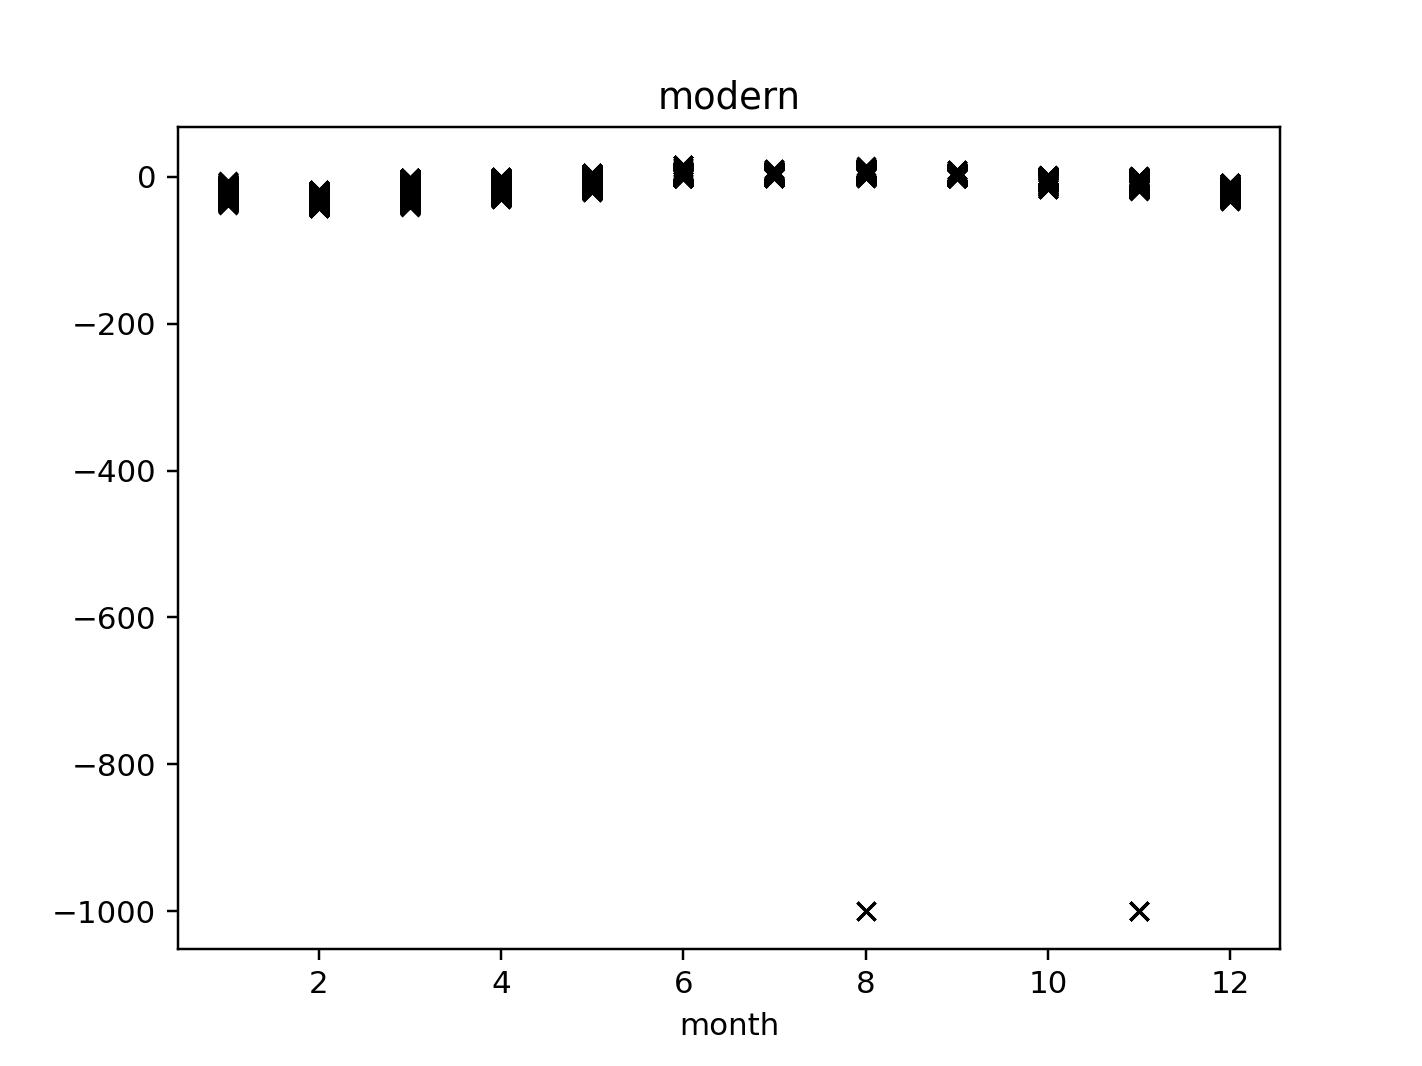

Text(0.5, 1.0, 'modern')

In [6]:
# Plot the temperatures as a function of month
plt.figure()
x = np.array(dfmodern['month'])
y = np.array(dfmodern['temperature'])
plt.plot(x,y, 'x', color='black')

# Annotate the graph
plt.xlabel('month')
plt.title('modern')

### Pause for analysis
Take a close look at this graph. You'll probably notice some absurdly low "temperatures", close to -1000 degrees! Don't be alarmed -- those are actually flags saying the data are bad -- something happened to the data. NOAA's flag for bad temperature data is "-999.9". In the cell below, write the names of the months seem to have bad data.

Months that have bad data are ...



### Step 2. Removing bad data
How do you get rid of bad data? The code below directs Pandas to look at each row, and if the temperature is -999.9, it records the index of that row, in a list called "badindices". The next line of code is a very cool Pandas functionality: it drops (gets rid of) those indices from the dataframe!

In [7]:
# Find the bad temperatures
badindices = dfmodern[ dfmodern['temperature'] == -999.9 ].index
print('I am going to drop this many missing data points: ', len(badindices))

# Drop the bad temperatures if any
dfmodern.drop(badindices,inplace=True)

I am going to drop this many missing data points:  9


### Step 3. Verifying
Below, we repeat the above graphics to make sure we really did get rid of those bad data.

<IPython.core.display.Javascript object>


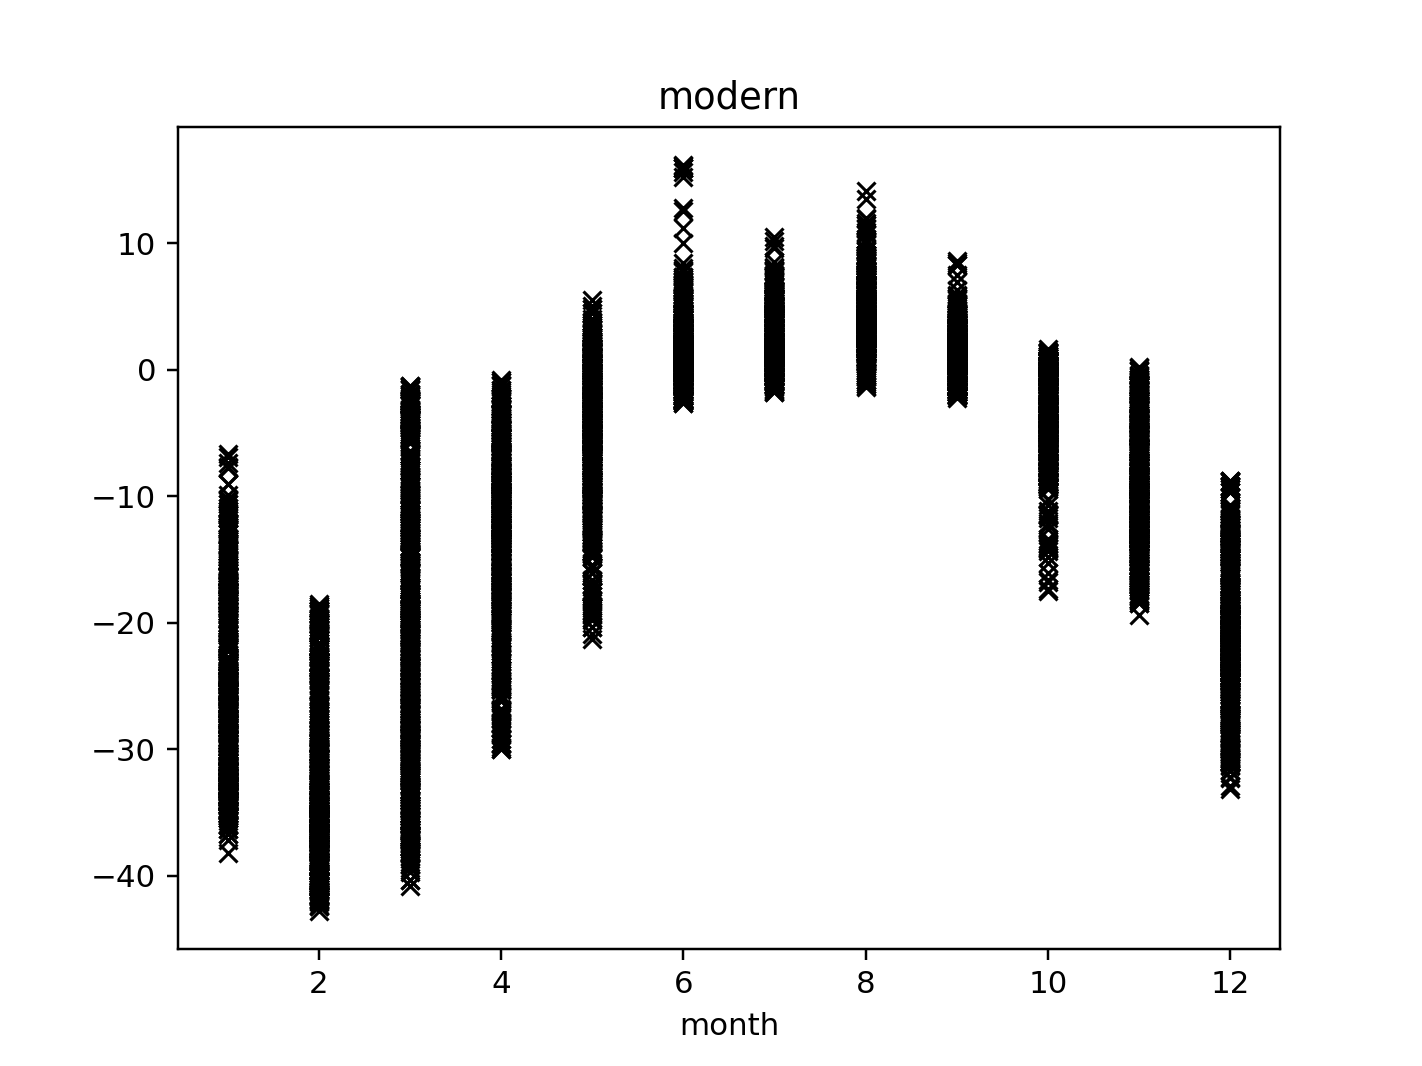

Text(0.5, 1.0, 'modern')

In [8]:
# Plot the temperatures as a function of month
plt.figure()
x = np.array(dfmodern['month'])
y = np.array(dfmodern['temperature'])
plt.plot(x,y, 'x', color='black')

# Annotate the graph
plt.xlabel('month')
plt.title('modern')

### Your turn
In the cells below, repeat this 3-step method for the "df1970s" dataframe you loaded in.

<IPython.core.display.Javascript object>


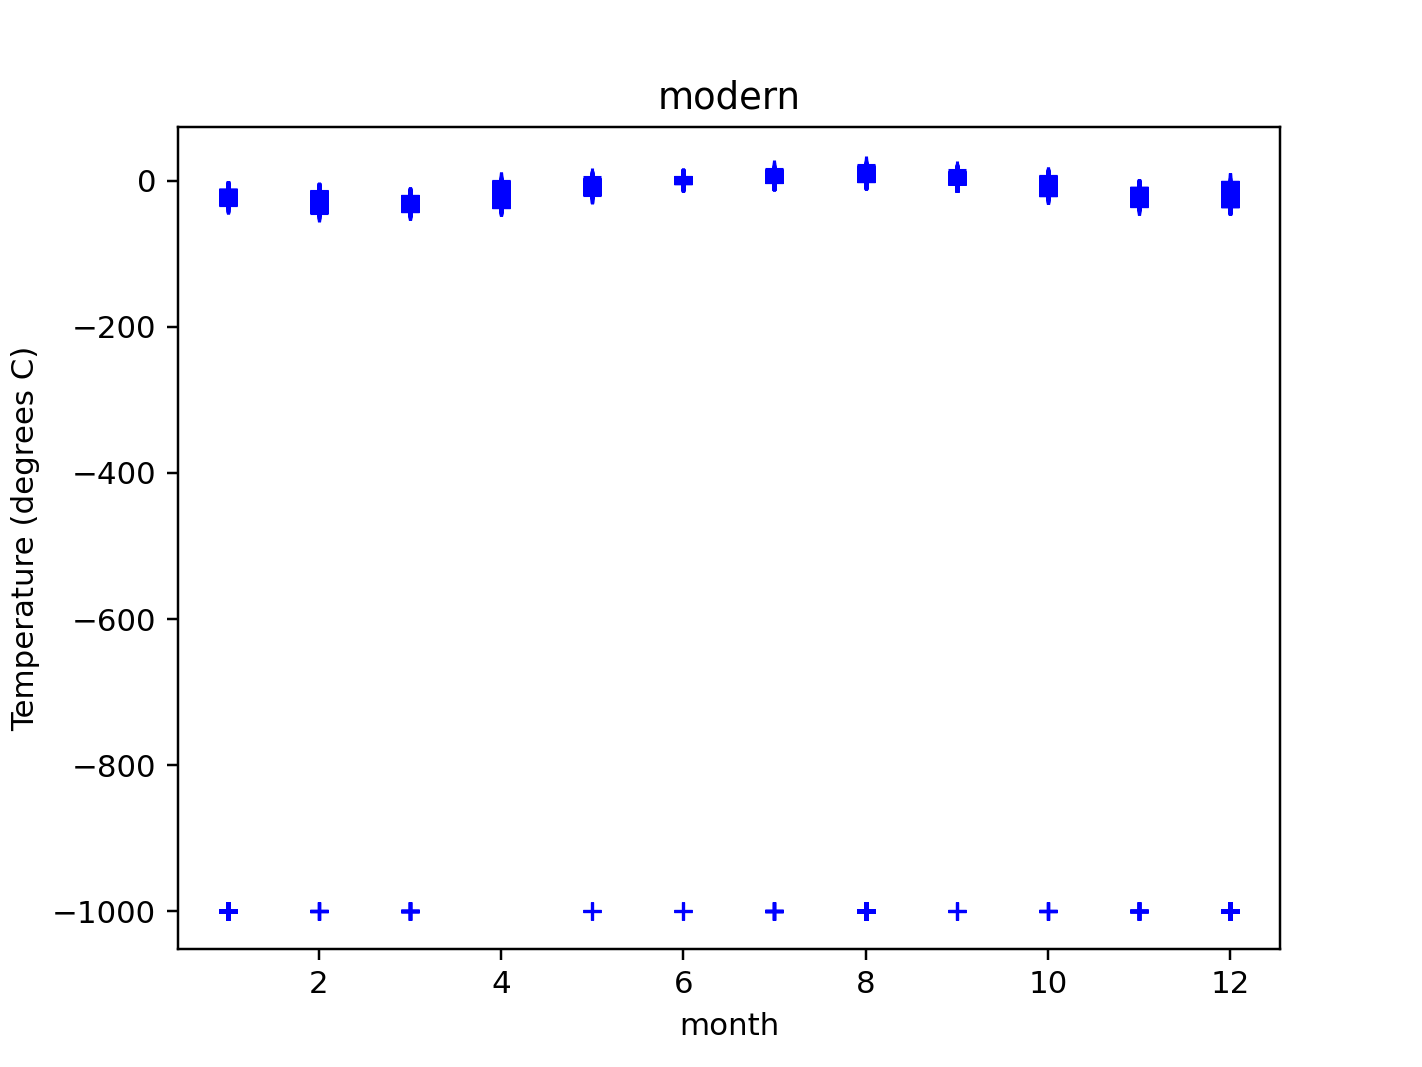

Text(0.5, 1.0, 'modern')

In [9]:
# Step 1. Inspecting the raw temperature data
### BEGIN SOLUTION ###
plt.figure()
x = np.array(df1970s['month'])
y = np.array(df1970s['temperature'])
plt.plot(x,y, '+', color='blue')
plt.ylabel('Temperature (degrees C)')

# Annotate the graph
plt. xlabel('month')
plt.title('modern')
### END SOLUTION ###

In [10]:
# Step 2. Removing bad data

### BEGIN SOLUTION ###
# Finding bad temperatures from this dataframe
badindices = df1970s[df1970s['temperature'] == -999.9 ].index
print('I found this many missing data points: ', len(badindices))

# Drop the bad temperatures if any
df1970s.drop(badindices,inplace=True)
### END SOLUTION ###

I found this many missing data points:  606


<IPython.core.display.Javascript object>


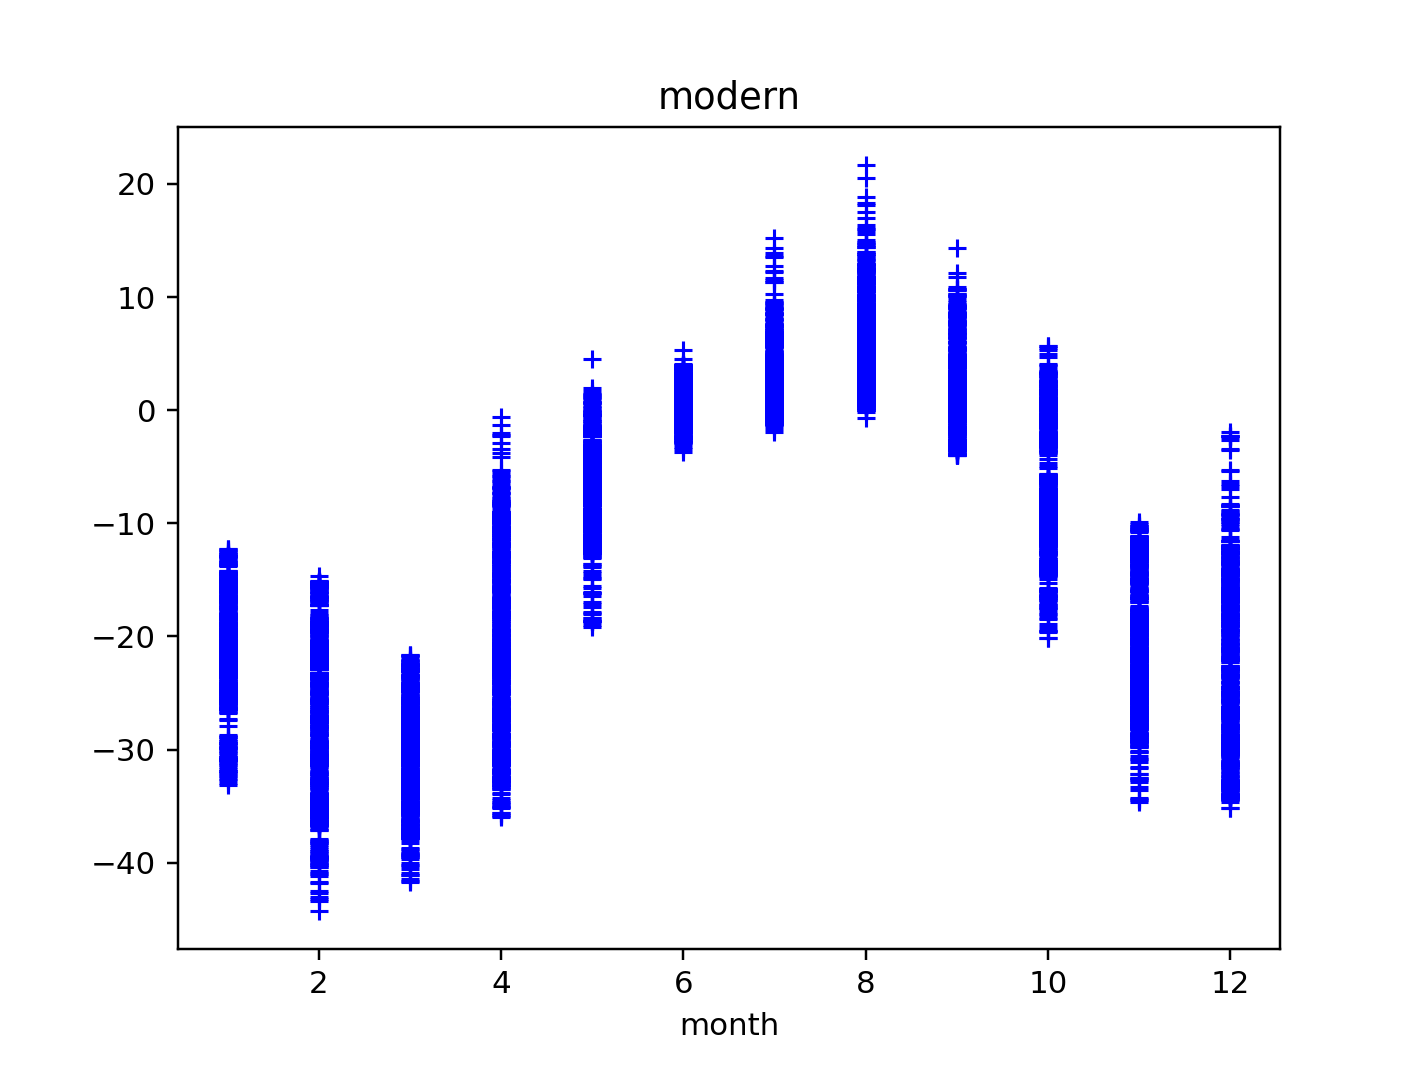

Text(0.5, 1.0, 'modern')

In [11]:
# Step 3. Verification. This time use the symbol '+' and the color 'blue'

### BEGIN SOLUTION ###
# Plot the temperatures as a function of month
plt.figure()
x = np.array(df1970s['month'])
y = np.array(df1970s['temperature'])
plt.plot(x,y, '+', color='blue')

# Annotate the graph
plt. xlabel('month')
plt.title('modern')
### END SOLUTION

### Plotting on the same graph
You have probably already noticed that it's a bit difficult to _compare_ two datasets unless you graph them together. In the cell below, plot the modern and 1970s monthly temperature data on the same graph, using the black/blue coding you did before. Add a legend using the label/legend method.

<IPython.core.display.Javascript object>


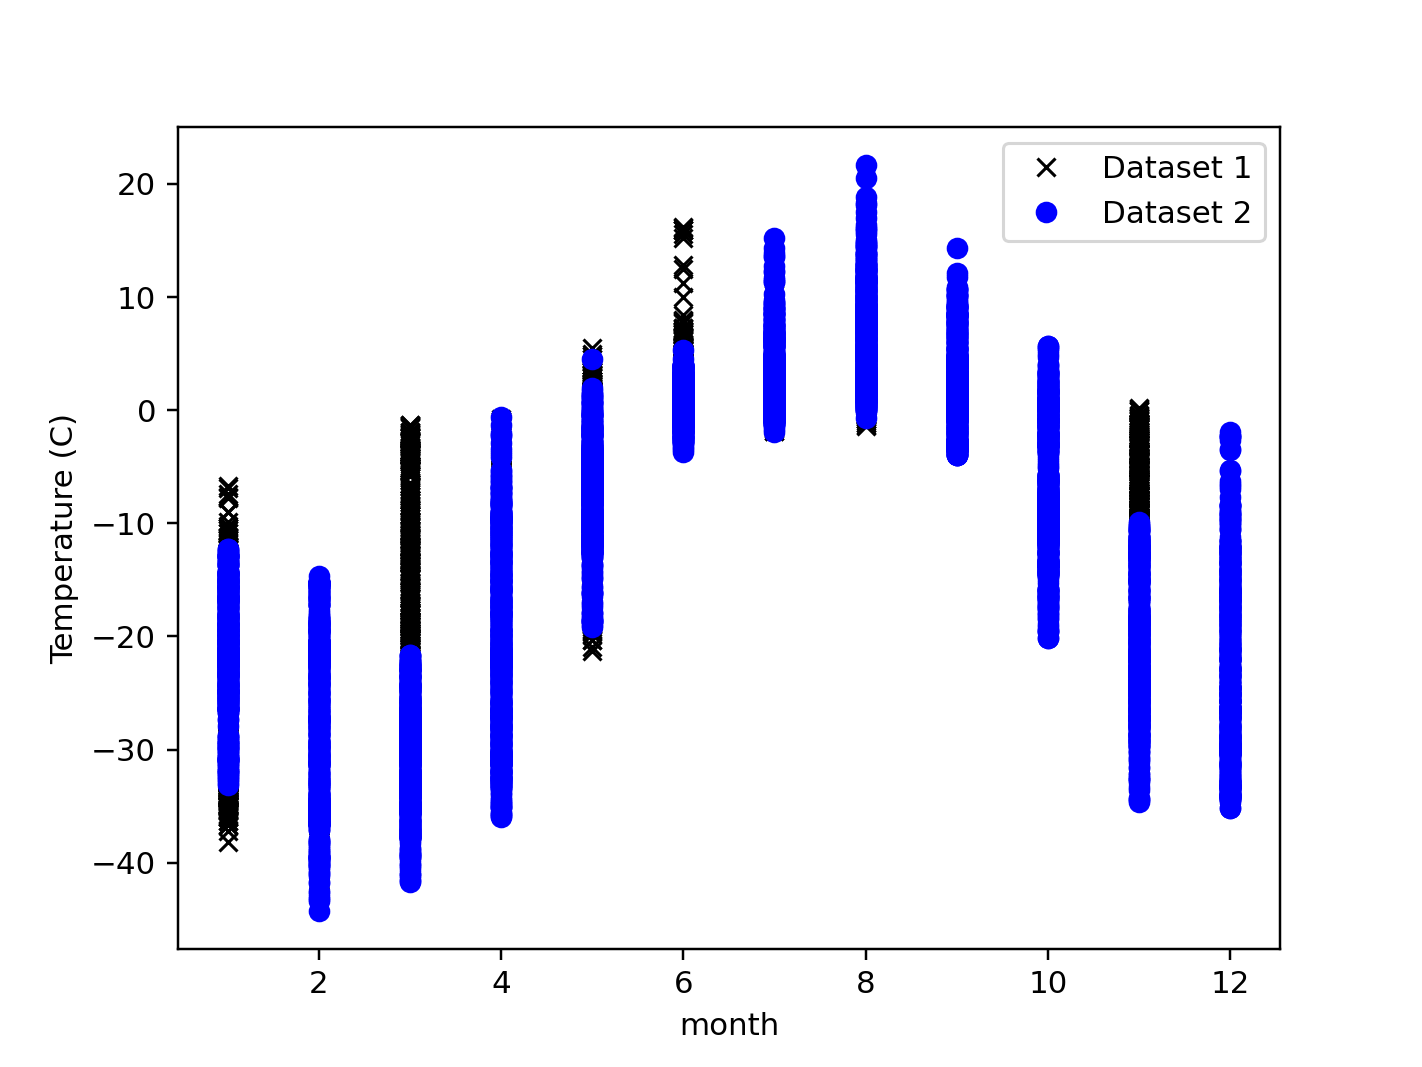

In [12]:
# Plotting the modern and 1970s temperature on the same graph

### BEGIN SOLUTION ###
plt.figure()

x = np.array(dfmodern['month'])
y = np.array(dfmodern['temperature'])
# plt.plot(x,y, 'x', color='black',label='modern')
plt.plot(x,y, 'x', color='black',label='Dataset 1')

x = np.array(df1970s['month'])
y = np.array(df1970s['temperature'])
# plt.plot(x,y, '+', color='blue',label='1970s')  
plt.plot(x,y, 'o', color='blue',label='Dataset 2')  

plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.legend()
### END SOLUTION ###

### Pause for analysis
Take a moment to examine the plot you just made, and use the cell below to record a few observations about the seasonal variation it reveals. What, for example, are the hottest and coldest months at BRW (Utqiagvik)?

Although it's not good climate science to make climate inferences by comparing just two years -- you need averages over 10, 20, ideally 30 years -- it's often useful to make an initial assessment based on the data at hand. What stands out about the data you see? If you were to choose a month in which warming seems to be amplified over other months, which month would that be?

### Focusing on a month of interest
The cell below will be used to focus on for the next bit of analysis. According to the metadata, the numbering is what you'd expect: January = 1, February = 2, etc). You can change it, of course, to any month. 

In [13]:
# Specify which month we want to focus on
monthofinterest = 3

# Reassign the monthofinterest, if you want
### BEGIN SOLUTION
### END SOLUTION

### Extracting specific months from our dataframe
The cell below shows how to extract data belonging to the month indicated by the variable "monthofinterest", and graph it.

,station,year,month,day,hour,winddirection,windspeed,temperature
1440,BRW,2020,3,1,0,246,4.1,-23.3
1441,BRW,2020,3,1,1,259,3.4,-23.7
1442,BRW,2020,3,1,2,260,3.9,-25.4
1443,BRW,2020,3,1,3,272,3.2,-25.8
1444,BRW,2020,3,1,4,267,2.6,-26.7
...,...,...,...,...,...,...,...,...
2179,BRW,2020,3,31,19,197,5.4,-14.7
2180,BRW,2020,3,31,20,197,6.8,-13.5
2181,BRW,2020,3,31,21,217,8.0,-11.6
2182,BRW,2020,3,31,22,219,8.6,-10.4


<IPython.core.display.Javascript object>


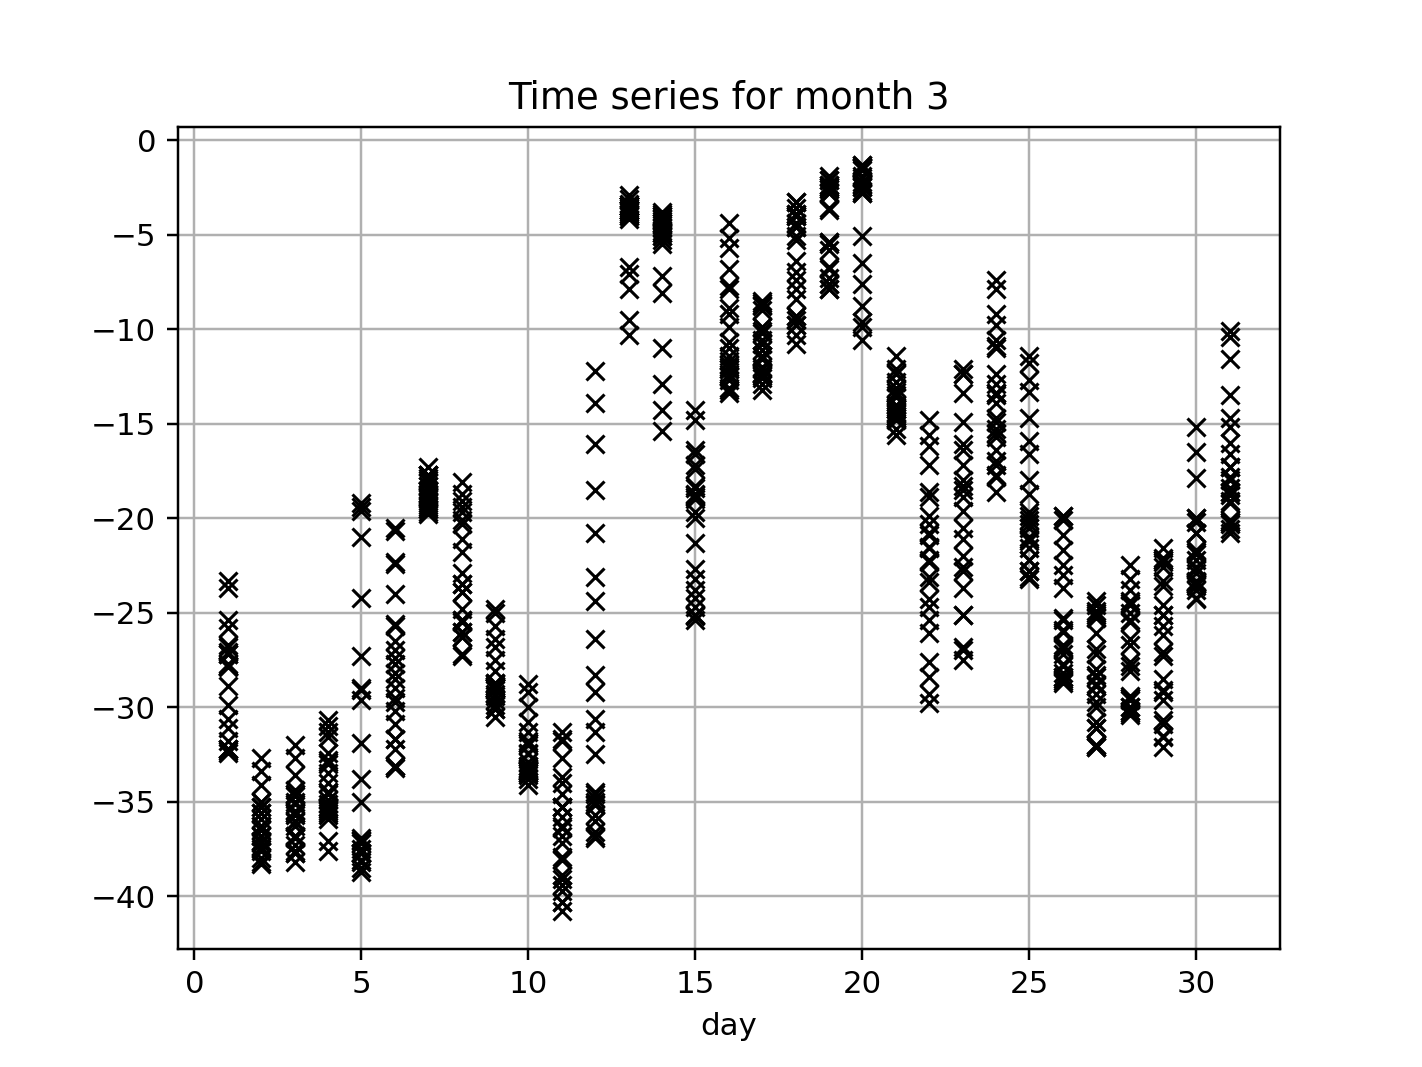

In [14]:
# Extract data belonging to the month of interest
dfmodern_monthly = dfmodern[dfmodern['month'] == monthofinterest]
display(dfmodern_monthly) 

# Open a figure
plt.figure()

# Convert to numpy arrays and plot the day and temperature
x = np.array(dfmodern_monthly['day'])
y = np.array(dfmodern_monthly['temperature'])
plt.plot(x,y, 'x', color='black')

# Annotation
plt.title('Time series for month '+str(monthofinterest))
plt.xlabel('day')
plt.grid()

### Your turn
Extract the data for the same month, and plot the temperature a function of the day of the month, for the 1977 dataset. Let's stick with the '+' and 'blue' representation we used before.

,station,year,month,day,hour,winddirection,windspeed,temperature
1417,BRW,1977,3,1,1,350,1.3,-30.0
1418,BRW,1977,3,1,2,300,0.9,-29.4
1419,BRW,1977,3,1,3,35,4.0,-28.8
1420,BRW,1977,3,1,4,7,4.5,-28.9
1421,BRW,1977,3,1,5,353,4.5,-30.2
...,...,...,...,...,...,...,...,...
2132,BRW,1977,3,30,20,60,8.5,-25.2
2133,BRW,1977,3,30,21,58,8.0,-24.1
2134,BRW,1977,3,30,22,53,7.6,-24.3
2135,BRW,1977,3,30,23,50,6.7,-24.4


<IPython.core.display.Javascript object>


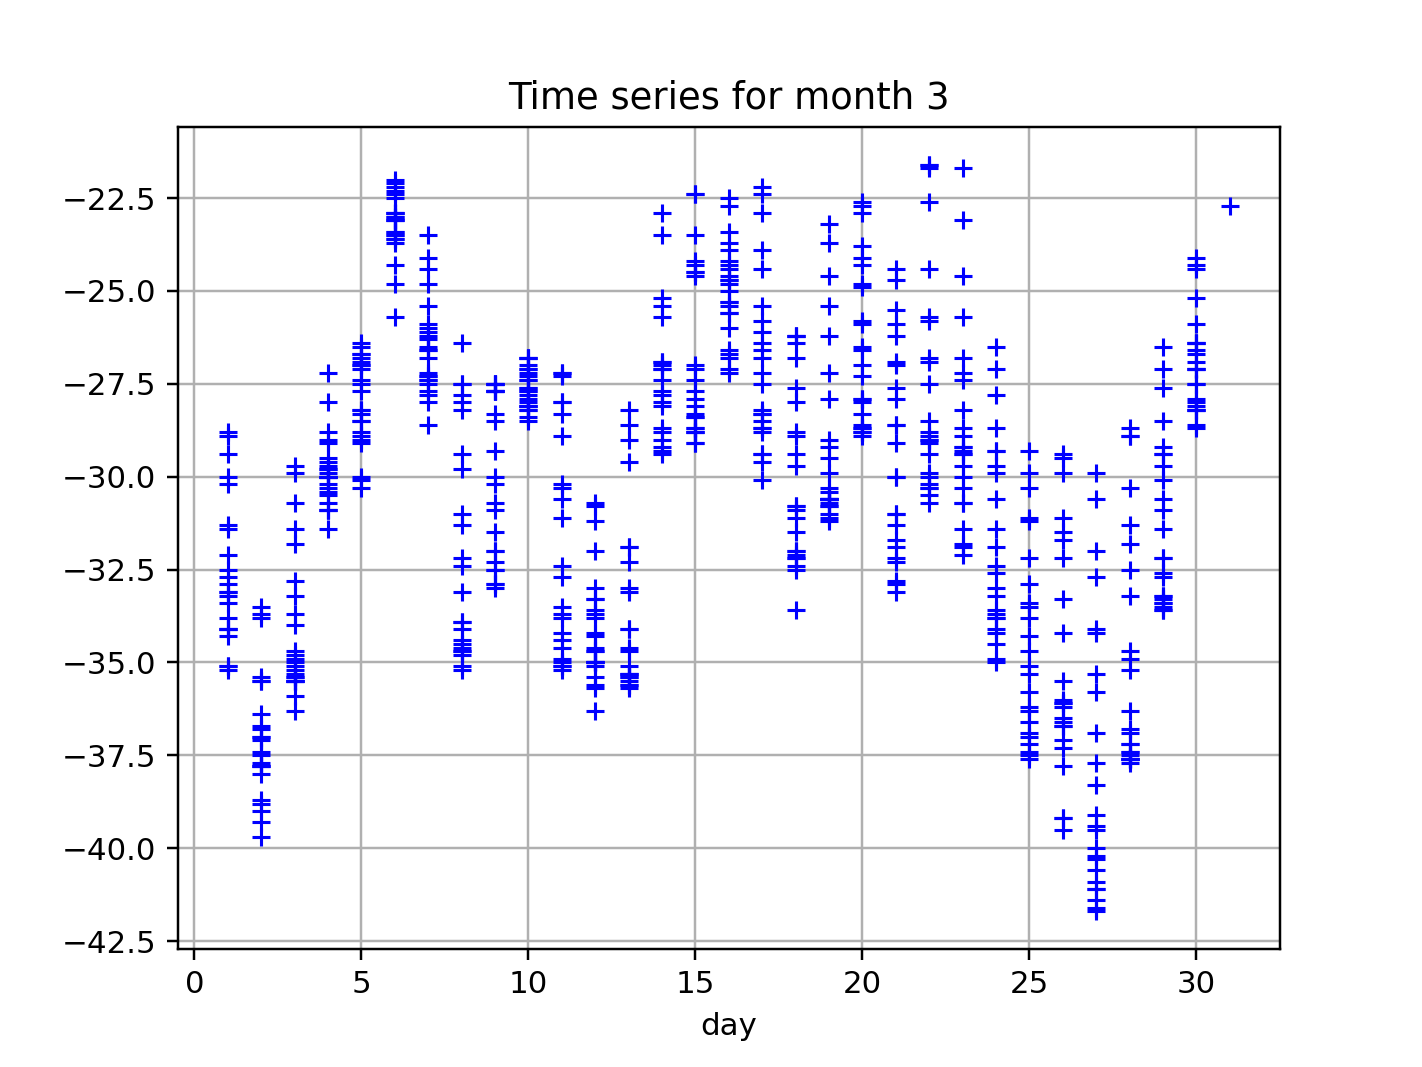

In [15]:
### BEGIN SOLUTION ###
# Extract data belonging to the month of interest
df1970s_monthly = df1970s[df1970s['month'] == monthofinterest]
display(df1970s_monthly) 

# Open a figure
plt.figure()

# Convert to numpy arrays and plot the day and temperature
x = np.array(df1970s_monthly['day'])
y = np.array(df1970s_monthly['temperature'])
plt.plot(x,y, '+', color='blue')

# Annotation
plt.title('Time series for month '+str(monthofinterest))
plt.xlabel('day')
plt.grid()
### END SOLUTION ###

### Calculating histograms and probability densities
In the foregoing, you might have noticed that it's a little hard to infer trends from visual inspection of a time series. A more useful statistical strategy is called *binning*. Binning involves grouping data into ranges of the weather variable of interest -- in this case, temperatures in a given month. Binning is a key statistical method of climate science.

Numpy's binning function is the _histogram_ function, referred to below as "np.histogram". As with all Python functions, information given _to_ np.histogram is specified in the parentheses. In this case, this is the variable "dfmodern_monthly['temperature']". This means the histogram will be based on the monthly temperatures of the modern year.

Information produced _by_ np.histogram is specified in the two variables to the left_ of np.histogram:
- The first of these variables, "histmonthlymodern" will contain the number of temperature measurements that fall within each bin.
- The second variable, "edgesmonthlymodern", will specify the boundaries, or edges, of each temperature bin. What are the boundaries of the first bin?  

The cell below does this for the modern dataset.

10
11
10


<IPython.core.display.Javascript object>


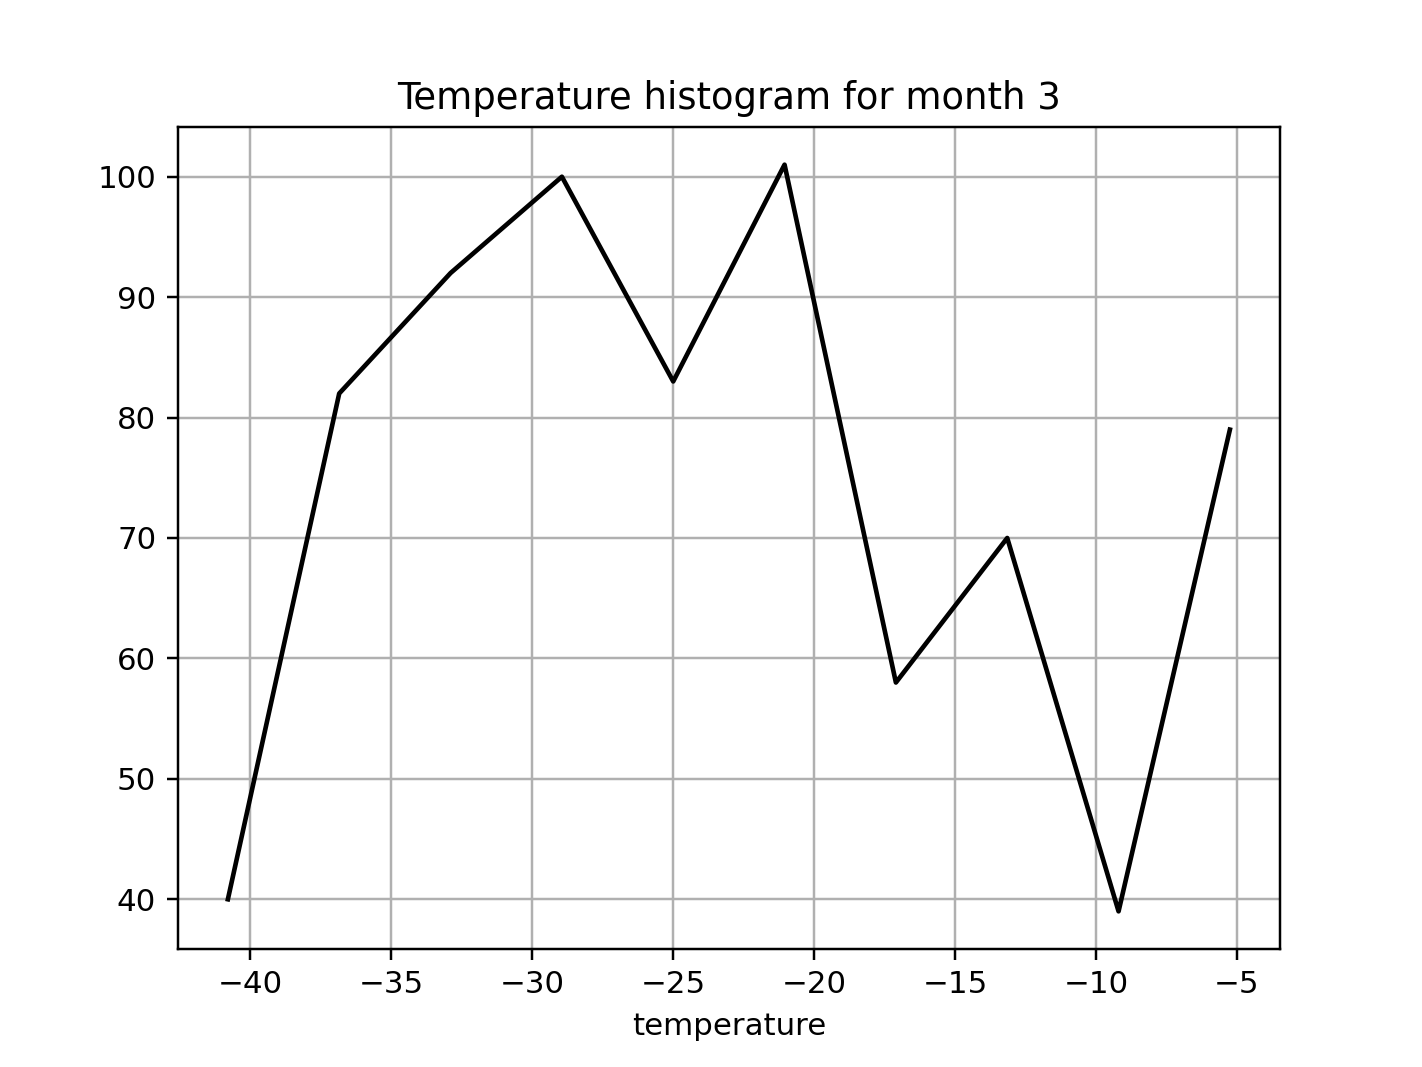

In [16]:
# Get the histogram for the modern dataset
histmonthlymodern, edgesmonthlymodern = np.histogram(dfmodern_monthly['temperature'])

# Check on some array lengths
print(np.size(histmonthlymodern))
print(np.size(edgesmonthlymodern))
print(np.size(edgesmonthlymodern[0:-1]))

# Plot the histogram 
plt.figure()
plt.plot(edgesmonthlymodern[0:-1],histmonthlymodern,color='black')
plt.title('Temperature histogram for month '+str(monthofinterest))
plt.xlabel('temperature')
plt.grid()

### Pause for analysis
In the cell above, you might have noticed a strange notation: edgesmonthlymodern[0:-1]. Why? The short story is, a set of 10 _bins_ requires that we specify 11 _edges_ (AKA _bin boundaries_). So when we plot the number of observations, we have to leave off either the first edge, or the last one. The "-1" in  edgesmonthlymodern[0:-1] means we've chosen to leave off the last one. An alternative would be to use edgesmonthlymodern[1:]. Hopefully, conclusions don't depend on which of these we choose, but it's often useful to try both just to be sure.

It's also often useful to scale a histogram so that the area under the curve is some specified value (usually, $area=1$). This is called _normalizing_. When we normalize a histogram, we also give it a new name: we call it a _probability density_. Numpy does this when you specify the _density_ argument in the histogram function, as shown below.

10
11
10


<IPython.core.display.Javascript object>


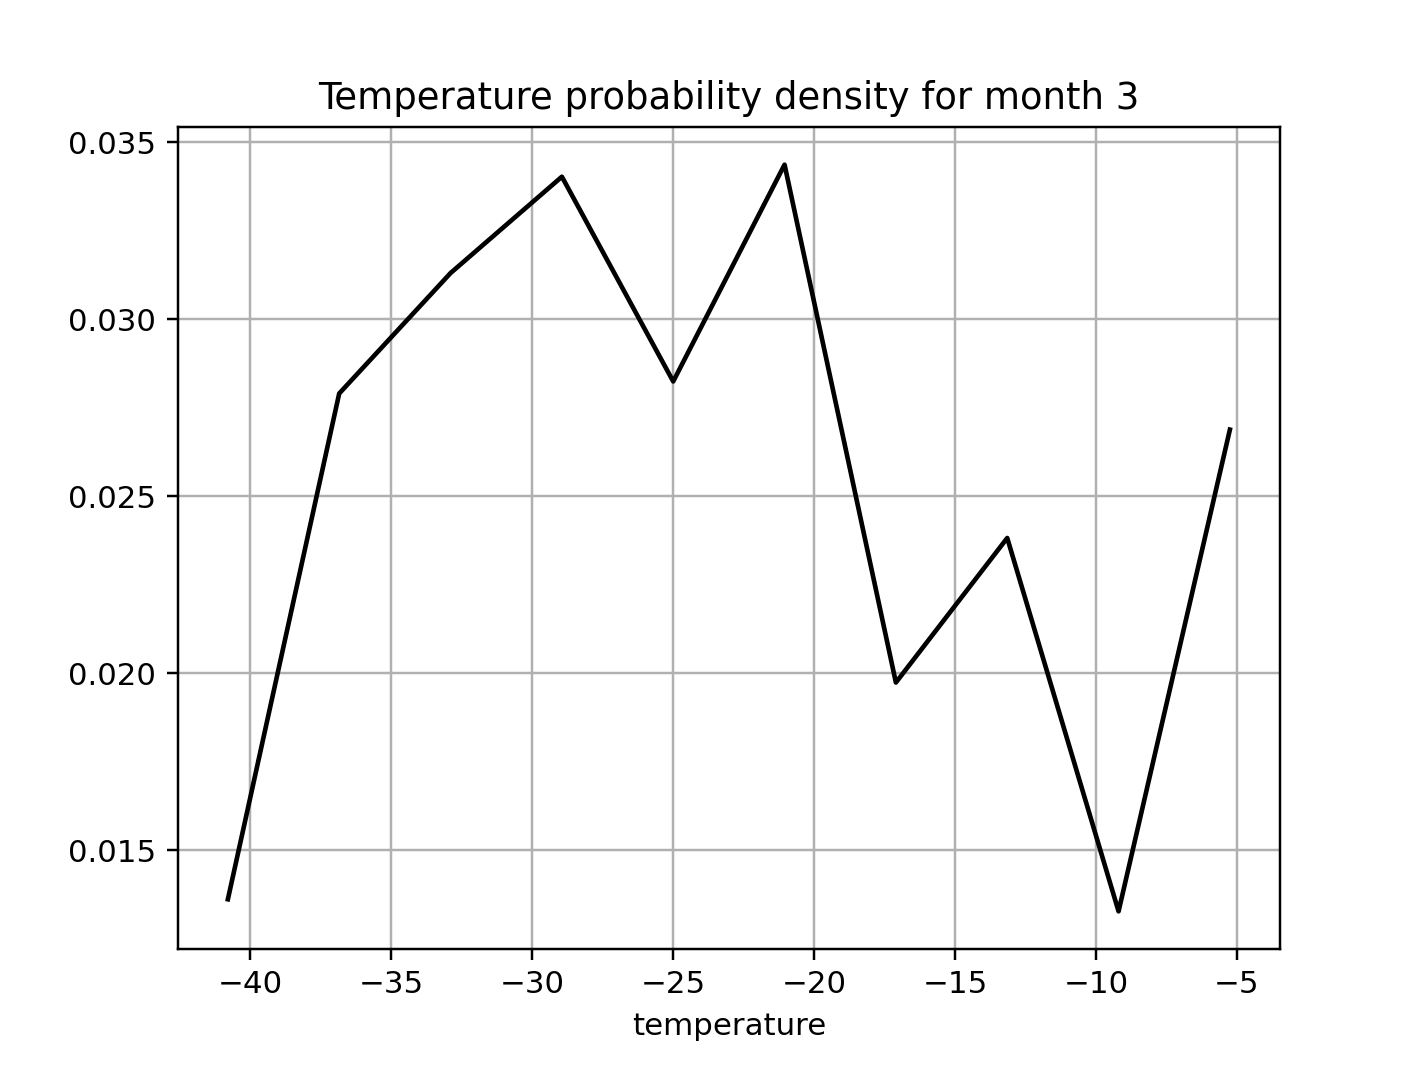

In [17]:
# Get the probability density
histmonthlymodern, edgesmonthlymodern = np.histogram(dfmodern_monthly['temperature'],density=True)

# Check on some array lengths
print(np.size(histmonthlymodern))
print(np.size(edgesmonthlymodern))
print(np.size(edgesmonthlymodern[0:-1]))

# Plot the probability density
plt.figure()
plt.plot(edgesmonthlymodern[0:-1],histmonthlymodern,color='black')
plt.title('Temperature probability density for month '+str(monthofinterest))
plt.xlabel('temperature')
plt.grid()

### Pause for analysis
You can see that the probability density _looks_ the same as the histogram, but notice the vertical axis is a lot different. 

### Your turn
OK, do the same for the 1970s dataset -- but you can skip the histogram, and just go for the probability density, since that's what we're most interested in.

10
11
10


<IPython.core.display.Javascript object>


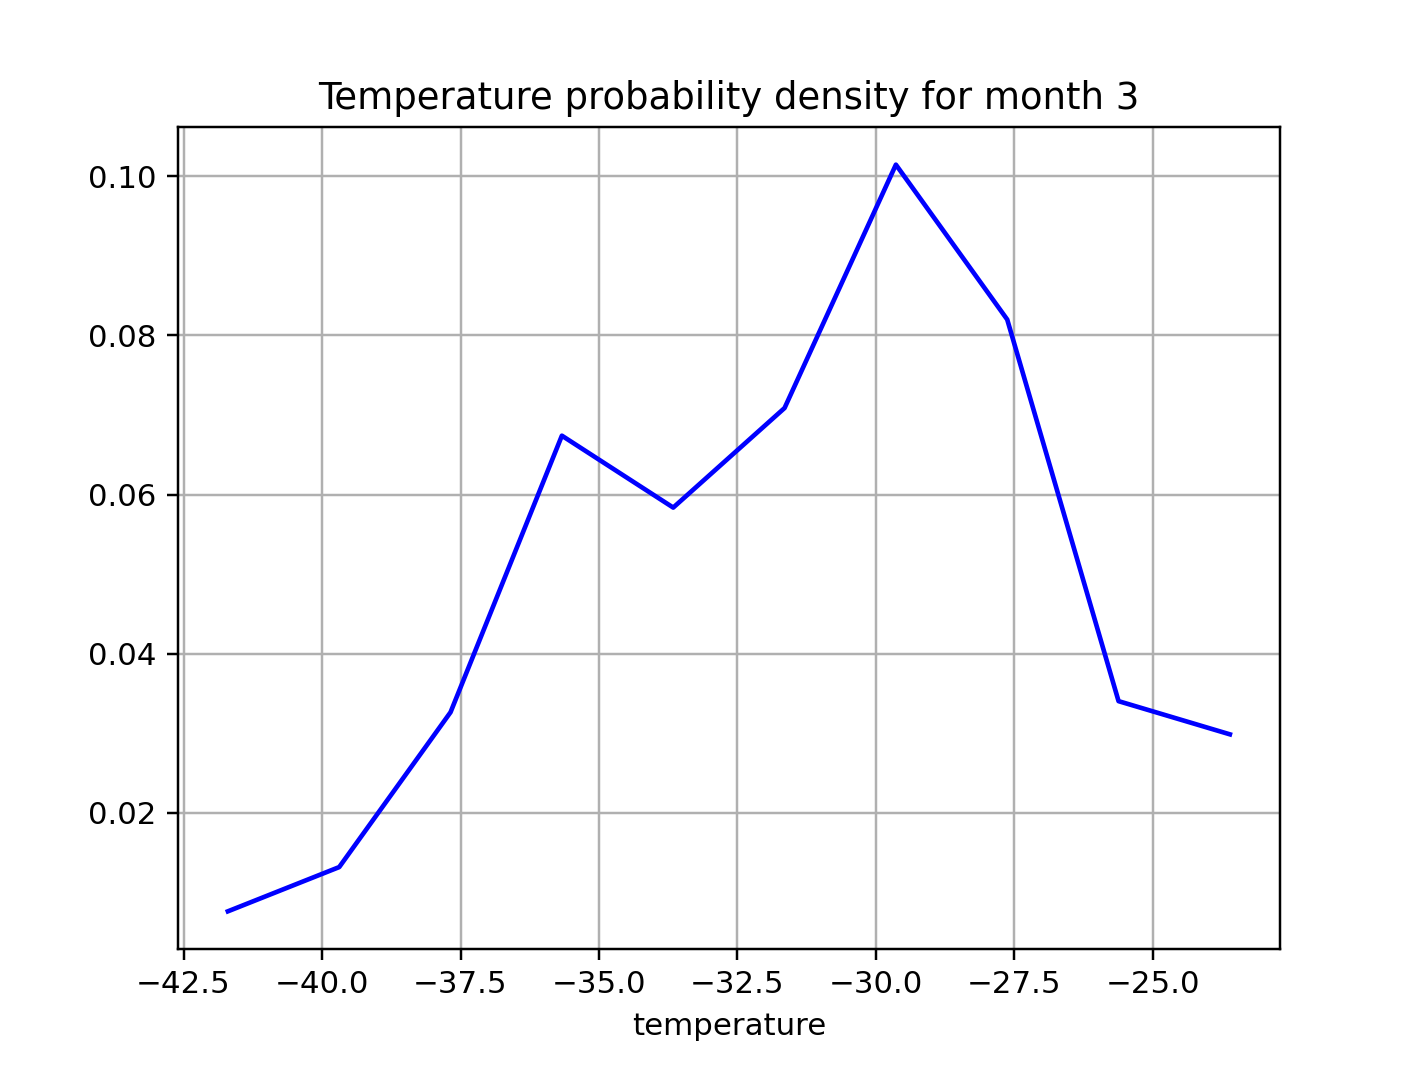

In [18]:
### START SOLUTION ###
# Get the histogram for the 1970s dataset
histmonthly1970s, edgesmonthly1970s = np.histogram(df1970s_monthly['temperature'], density=True)

# Check on some array lengths
print(np.size(histmonthly1970s))
print(np.size(edgesmonthly1970s))
print(np.size(edgesmonthly1970s[0:-1]))

#Plot the resulting probability density
plt.figure()
plt.plot(edgesmonthly1970s[0:-1],histmonthly1970s,color='blue')
plt.title('Temperature probability density for month ' +str(monthofinterest))
plt.xlabel('temperature')
plt.grid()
### END SOLUTION ###

### Your turn (again)
In the cell below, plot the probability densities for the two years on the same graph. Annotate using the label/legend method.

<IPython.core.display.Javascript object>


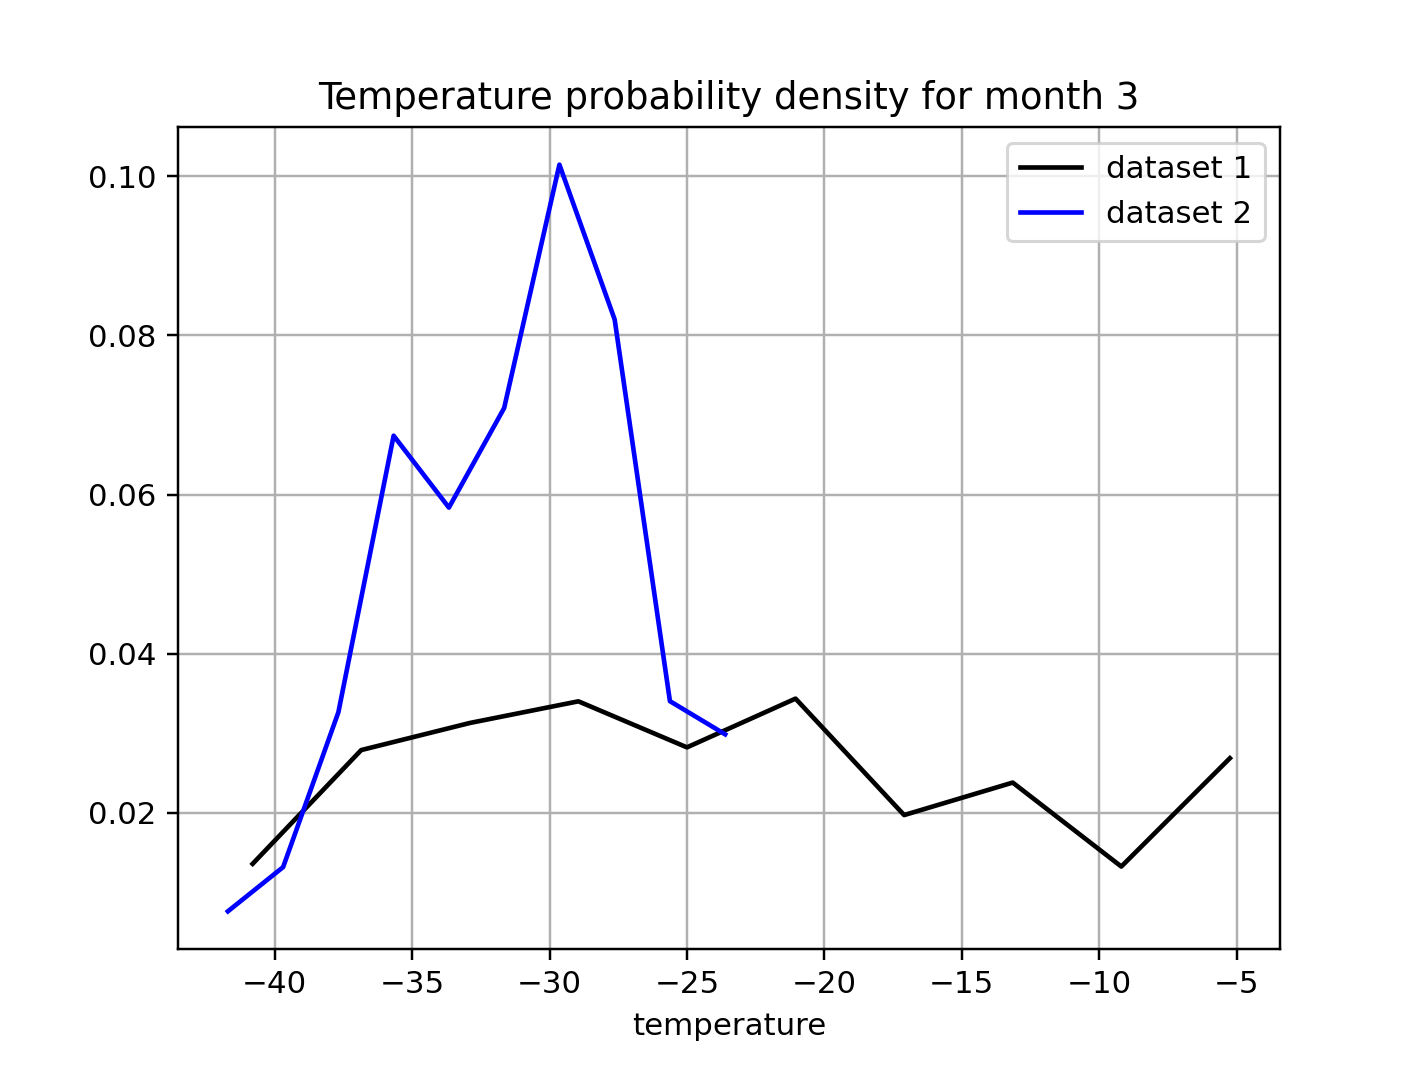

In [19]:
### BEGIN SOLUTION ###
# Open a figure window
plt.figure()

# Graph the two years
# plt.plot(edgesmonthlymodern[0:-1],histmonthlymodern, color='black', label = 'modern')
# plt.plot(edgesmonthly1970s[0:-1], histmonthly1970s, color='blue', label = '1970s')
plt.plot(edgesmonthlymodern[0:-1],histmonthlymodern, color='black', label = 'dataset 1')
plt.plot(edgesmonthly1970s[0:-1], histmonthly1970s, color='blue', label = 'dataset 2')

# Annotate
plt.title('Temperature probability density for month ' +str(monthofinterest))
plt.xlabel('temperature')
plt.grid()
plt.legend()
### END SOLUTION ###

### Pause for analysis 
Use the cell below to comment on what these datasets seem to be telling you. Key ideas would include *averages* and *variability*.

### Combining dataframes from multiple years
Below is an example of how to merge dataframes from multiple years. This will come in handy for building confidence in statistical inferences we can draw from these data.

In [20]:
# Modern data: load three years of data as separate dataframes
dfmodern1 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2017.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

dfmodern2 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2018.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

dfmodern3 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2019.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now join them 
dfmodern = pd.concat( [dfmodern1, dfmodern2, dfmodern3])

# Display the result
display(dfmodern)

,station,year,month,day,winddirection,windspeed,temperature
0,BRW,2017,1,1,178,2.8,-14.2
1,BRW,2017,1,1,172,3.1,-12.9
2,BRW,2017,1,1,144,3.0,-12.5
3,BRW,2017,1,1,119,3.8,-11.7
4,BRW,2017,1,1,103,3.7,-10.9
...,...,...,...,...,...,...,...
8755,BRW,2019,12,31,7,6.7,-24.6
8756,BRW,2019,12,31,6,6.8,-24.8
8757,BRW,2019,12,31,2,6.6,-25.1
8758,BRW,2019,12,31,9,6.7,-25.5


### Your turn
Do the same for three years in the 1970s, starting in 1977 (you can spill over into the 1980s too).

In [21]:
### BEGIN SOLUTION ###
# 1970s data: load three (or more!) years of data as separate dataframes
df1970s1 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1978.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df1970s2 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1979.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df1970s3 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1980.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now join them
df1970s = pd.concat( [df1970s1, df1970s2, df1970s3])

# Display the result
display(df1970s)
### END SOLUTION ###

,station,year,month,day,winddirection,windspeed,temperature
0,BRW,1978,1,1,150,5.4,-999.9
1,BRW,1978,1,1,141,4.9,-999.9
2,BRW,1978,1,1,130,4.0,-999.9
3,BRW,1978,1,1,123,4.5,-18.4
4,BRW,1978,1,1,129,4.9,-18.2
...,...,...,...,...,...,...,...
8779,BRW,1980,12,31,45,7.6,-36.5
8780,BRW,1980,12,31,45,7.6,-36.3
8781,BRW,1980,12,31,45,8.5,-36.1
8782,BRW,1980,12,31,40,9.4,-35.3


### The challenge
Your challenge is to put these ideas together in a larger context. Here are some ideas:

1. Compare probability densities of temperature for the two multi-year dataframes you have already collected (dfmodern and df1970s).
1. Expand the range of years included in your merging, and then compare probability densities.
1. Compare probability densities of some other weather variable (like wind speed) for multi-year dataframes.
1. Compare probability densities of temperature for multi-year dataframs, but for a station other than BRW.

Create cells below (you'll probably want several of them) in which you describe and then tackle at least one of these challenges. Then go for a second one on the list, or invent one yourself.

I am going to drop this many missing data points:  0
I am going to drop this many missing data points:  0


<IPython.core.display.Javascript object>


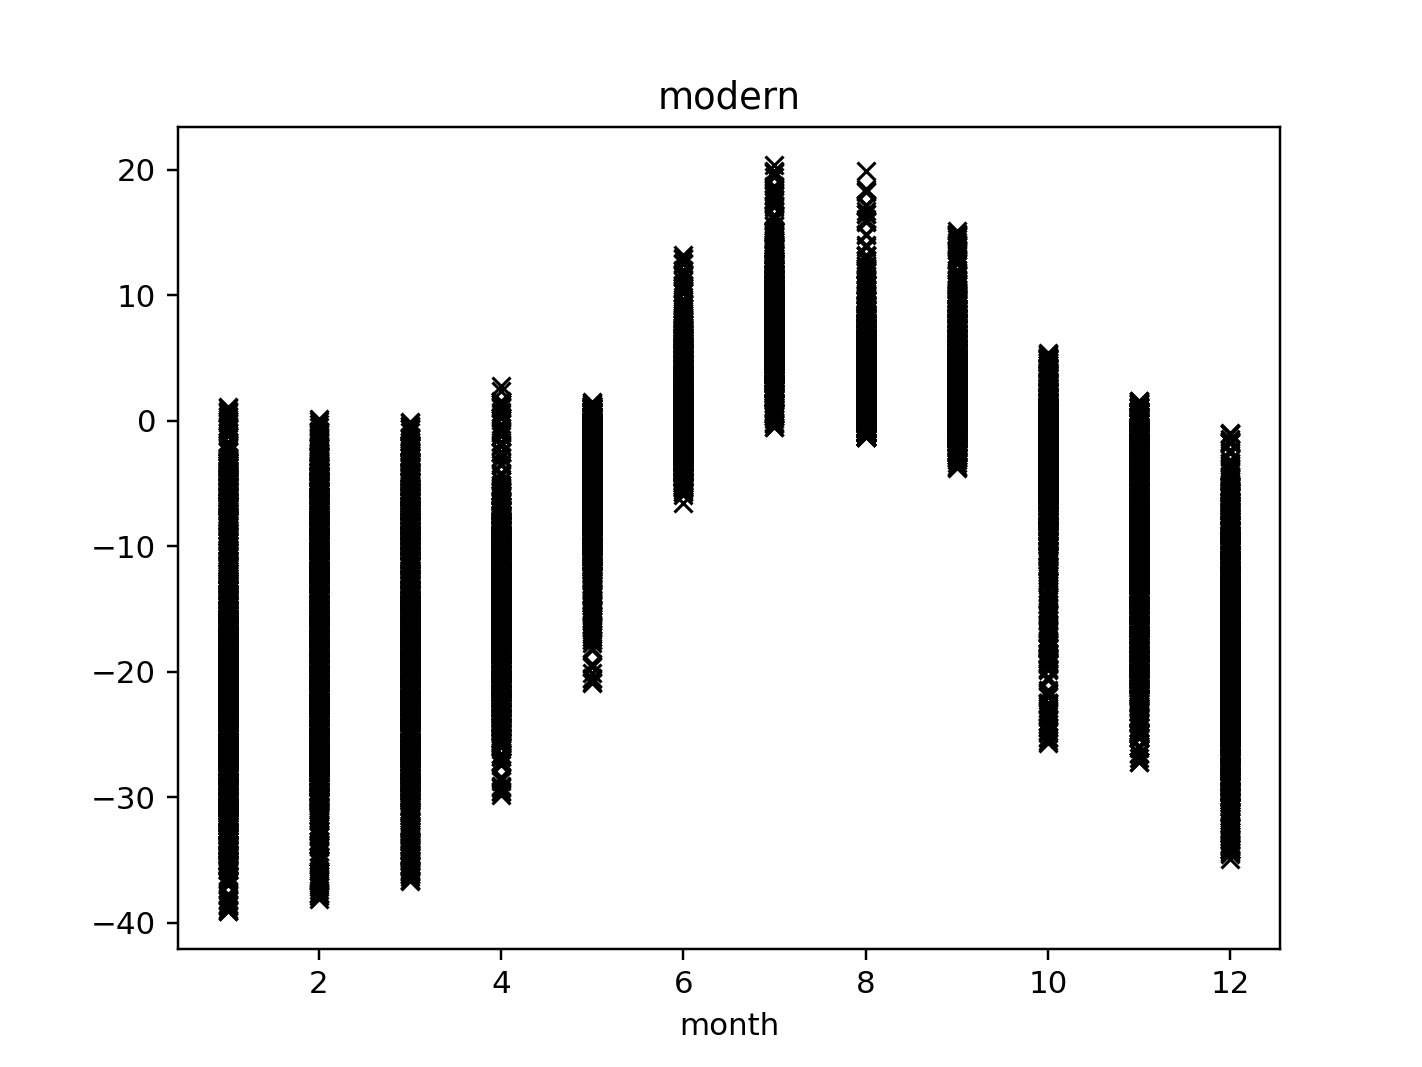

<IPython.core.display.Javascript object>


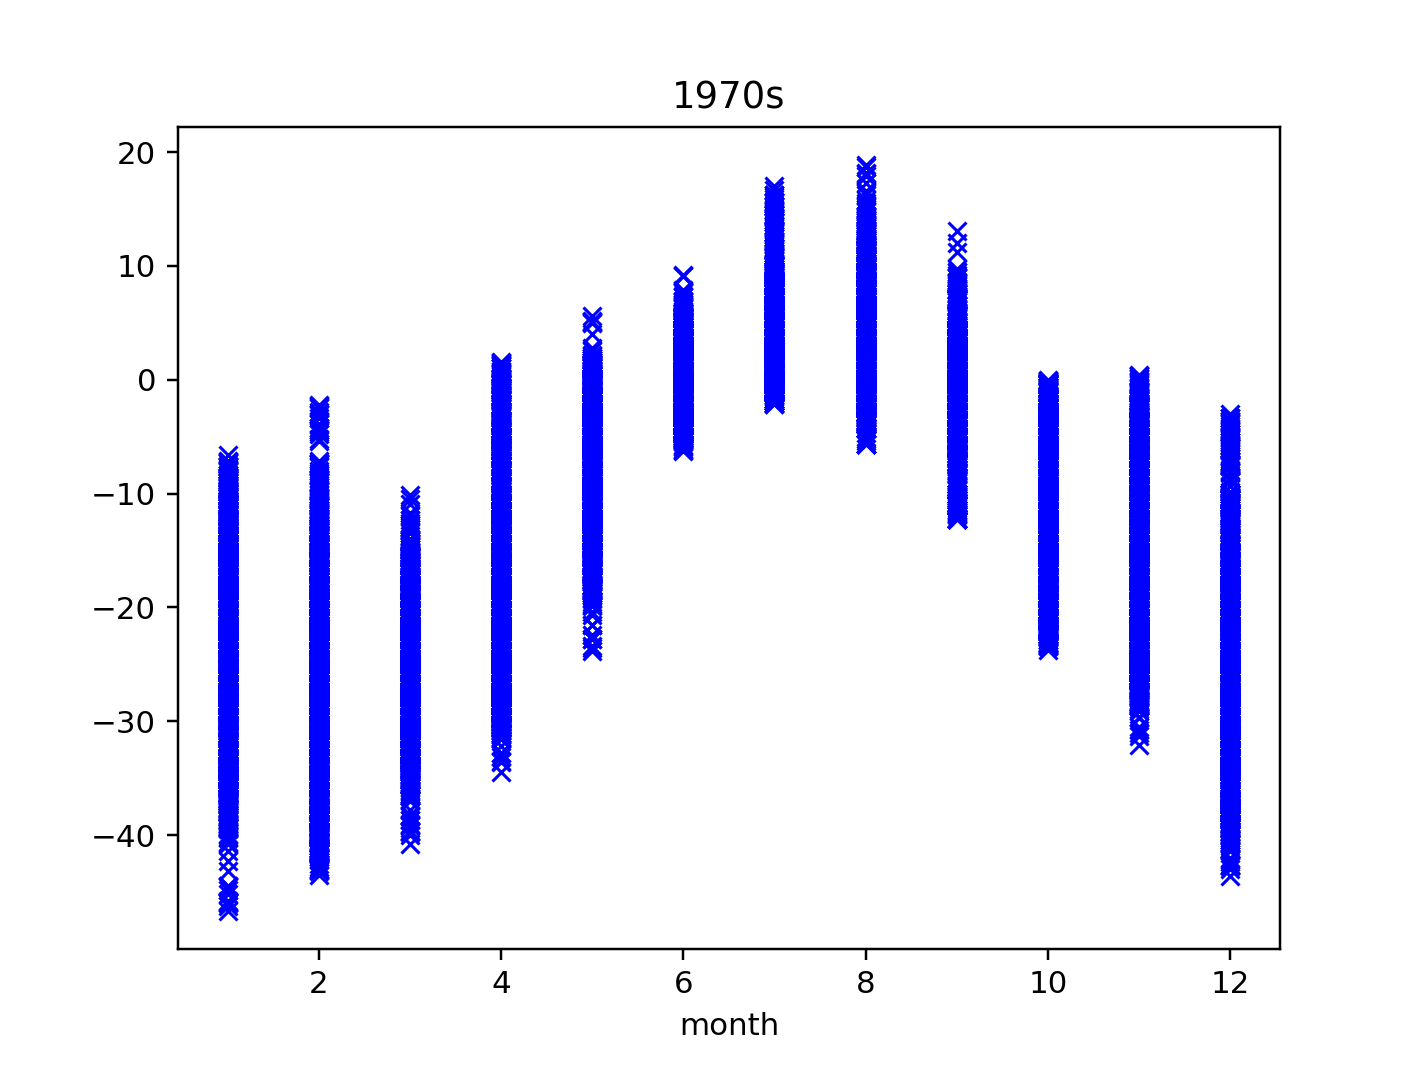

Text(0.5, 1.0, '1970s')

In [27]:
### BEGIN SOLUTION

# # This code is the solution (for next iteration of the course)
# plt.figure()
# x = np.array(dfmodern['month'])
# y = np.array(dfmodern['temperature'])
# plt.plot(x,y, 'x', color='black')
# plt.xlabel('month')
# plt.title('modern')

# plt.figure()
# x = np.array(df1970s['month'])
# y = np.array(df1970s['temperature'])
# plt.plot(x,y, 'x', color='blue')
# plt.xlabel('month')
# plt.title('modern')


# Find the bad temperatures
badindices = dfmodern[ dfmodern['temperature'] == -999.9 ].index
print('I am going to drop this many missing data points: ', len(badindices))
dfmodern.drop(badindices,inplace=True)

# Find the bad temperatures
badindices = df1970s[ df1970s['temperature'] == -999.9 ].index
print('I am going to drop this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

plt.figure()
x = np.array(dfmodern['month'])
y = np.array(dfmodern['temperature'])
plt.plot(x,y, 'x', color='black')
plt.xlabel('month')
plt.title('modern')

plt.figure()
x = np.array(df1970s['month'])
y = np.array(df1970s['temperature'])
plt.plot(x,y, 'x', color='blue')
plt.xlabel('month')
plt.title('1970s')


In [29]:

# Extract data belonging to the month of interest
dfmodern_monthly = dfmodern[dfmodern['month'] == monthofinterest]
df1970s_monthly = df1970s[df1970s['month'] == monthofinterest]
display(dfmodern_monthly) 
display(df1970s_monthly) 


,station,year,month,day,winddirection,windspeed,temperature
1416,BRW,2017,3,1,305,4.8,-23.7
1417,BRW,2017,3,1,293,4.9,-24.0
1418,BRW,2017,3,1,291,5.3,-24.1
1419,BRW,2017,3,1,289,5.1,-24.5
1420,BRW,2017,3,1,289,5.1,-24.7
...,...,...,...,...,...,...,...
2155,BRW,2019,3,31,276,4.1,-10.6
2156,BRW,2019,3,31,273,4.4,-10.2
2157,BRW,2019,3,31,273,5.2,-9.9
2158,BRW,2019,3,31,267,4.3,-10.1


,station,year,month,day,winddirection,windspeed,temperature
1416,BRW,1978,3,1,144,1.3,-12.9
1417,BRW,1978,3,1,137,2.2,-14.0
1418,BRW,1978,3,1,171,1.8,-15.6
1419,BRW,1978,3,1,136,4.0,-17.0
1420,BRW,1978,3,1,148,3.6,-17.1
...,...,...,...,...,...,...,...
2179,BRW,1980,3,31,60,8.5,-27.8
2180,BRW,1980,3,31,61,9.4,-27.1
2181,BRW,1980,3,31,62,9.4,-26.4
2182,BRW,1980,3,31,63,9.8,-25.6


10
11
10
10
11
10


<IPython.core.display.Javascript object>


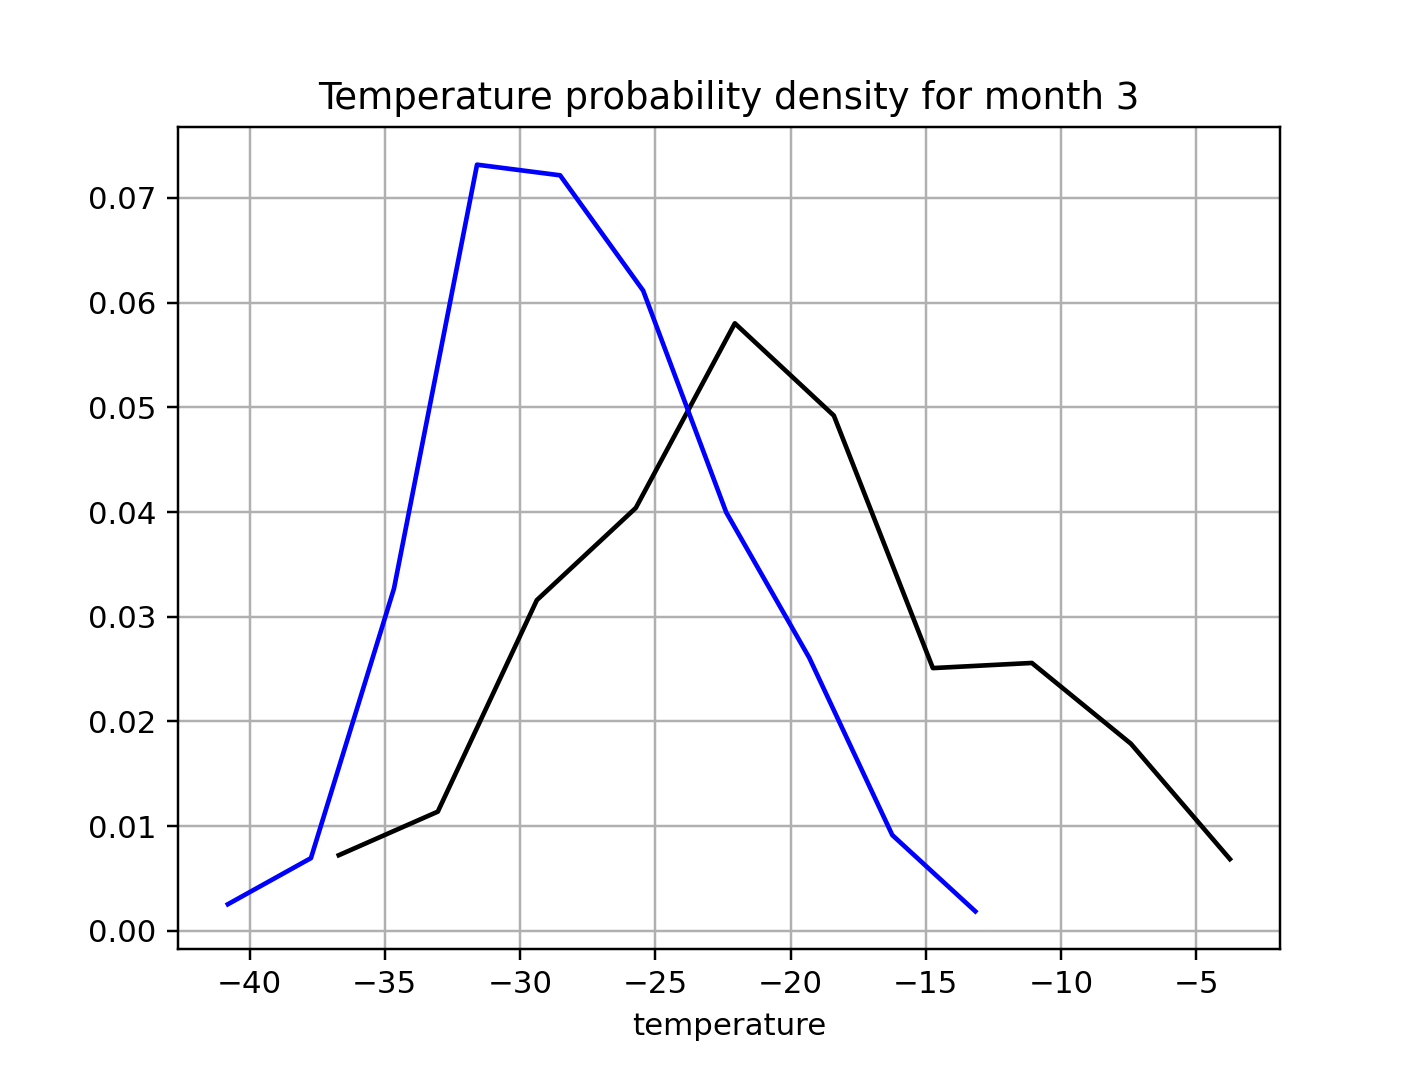

In [31]:
# Get the probability density
histmonthlymodern, edgesmonthlymodern = np.histogram(dfmodern_monthly['temperature'],density=True)

# Check on some array lengths
print(np.size(histmonthlymodern))
print(np.size(edgesmonthlymodern))
print(np.size(edgesmonthlymodern[0:-1]))


histmonthly1970s, edgesmonthly1970s = np.histogram(df1970s_monthly['temperature'], density=True)

# Check on some array lengths
print(np.size(histmonthly1970s))
print(np.size(edgesmonthly1970s))
print(np.size(edgesmonthly1970s[0:-1]))

#Plot the resulting probability density
plt.figure()
plt.plot(edgesmonthlymodern[0:-1],histmonthlymodern,color='black')
plt.plot(edgesmonthly1970s[0:-1],histmonthly1970s,color='blue')
plt.title('Temperature probability density for month ' +str(monthofinterest))
plt.xlabel('temperature')
plt.grid()
